# ML House Predictor

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
# To use plt.show in Jupyter
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit  
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#Model
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor() # To Change Model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from joblib import dump,load

In [2]:
housing = pd.read_csv("house_project_data.csv")
# housing = housing.iloc[:, :-4]

In [3]:
housing[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# HISTOGRAM PLOTTING

In [5]:
# housing.hist(bins=50, figsize=(20,10))
# plt.show()

# Train - Test Splitting ->Function

In [6]:
# def split_train_test(data,test_ratio):
#     np.random.seed(5) #--> To FIX the Shuffling value x can be anything --> it is the order
#     shuffled = np.random.permutation(len(data)) #--> random Shuffling all the data indices
# #     print(shuffled)
#     test_set_size= int(len(data)*test_ratio)
#     test_indices= shuffled[:test_set_size]
#     train_indices= shuffled[test_set_size:]
#     return data.iloc[train_indices] , data.iloc[test_indices]

In [7]:
# train_set, test_set= split_train_test(housing,0.2)

In [8]:
# print(f"Rows in Train Set : {len(train_set)}\n Rows in Test Set : {len(test_set)} ")

In [9]:
train_set, test_set= train_test_split(housing, test_size=0.2,random_state=42)
print(f"Rows in Train Set : {len(train_set)}\n Rows in Test Set : {len(test_set)} ")

Rows in Train Set : 404
 Rows in Test Set : 102 


In [10]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing[' CHAS']): #For equal ratio of CHAS
    strat_train_set = housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [11]:
strat_train_set #strat_train_set['CHAS'].value_counts()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


# Looking for Corelations(Value depending on others)  


In [12]:
corr_matrix=housing.corr()
corr_matrix[' MEDV'].sort_values(ascending = False)

 MEDV       1.000000
 RM         0.695360
 ZN         0.360445
 B          0.333461
 DIS        0.249929
 CHAS       0.175260
 AGE       -0.376955
 RAD       -0.381626
 CRIM      -0.388305
 NOX       -0.427321
 TAX       -0.468536
 INDUS     -0.483725
 PTRATIO   -0.507787
 LSTAT     -0.737663
Name:  MEDV, dtype: float64

array([[<AxesSubplot:xlabel=' MEDV', ylabel=' MEDV'>,
        <AxesSubplot:xlabel=' RM', ylabel=' MEDV'>],
       [<AxesSubplot:xlabel=' MEDV', ylabel=' RM'>,
        <AxesSubplot:xlabel=' RM', ylabel=' RM'>]], dtype=object)

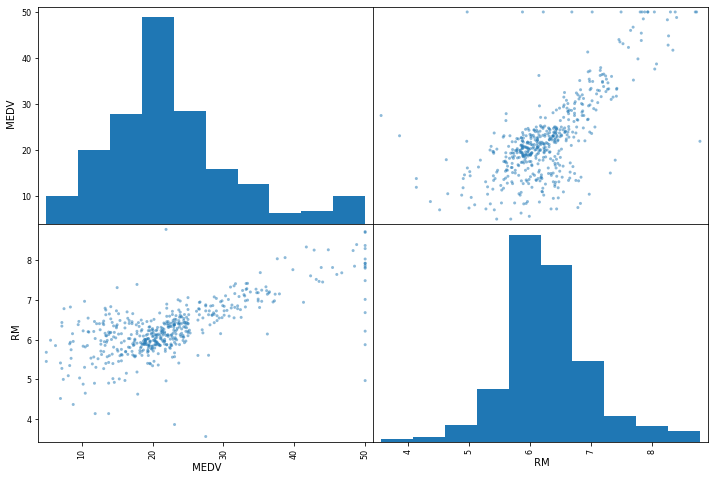

In [13]:
attributes = [" MEDV", " RM"]
scatter_matrix(housing[attributes], figsize= (12,8))
# housing.plot(kind = "scatter",x=" RM",y=" MEDV",alpha=0.6)

# Seprating Features & Labels

In [14]:
housing = strat_train_set.drop(" MEDV",axis=1)
housing_labels= strat_train_set[" MEDV"].copy()

# Imputer to fill Median Values in Missing Coloumns

In [15]:
imputer =  SimpleImputer(strategy="median")
imputer.fit(housing)
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [16]:
 X= imputer.transform(housing)
housing_tr= pd.DataFrame(X,columns=housing.columns)
# housing_tr.describe()  

# Feature Scaling
Primarily , two types of feature scaling methods:
1. Min-Max scaling (Normalization)
(value - min)/(max-min)
sklearn provides a class called *MinMaxScaler* for this

2. Standardization
(value - mean)/std
Sklearn provides a class called StandardScaler for this

# Creating Pipeline
To make changes in code/Model easily or to automate code

In [17]:
my_pipeline  = Pipeline([
                        ('imputer',SimpleImputer(strategy = "median")),
                       #ADDING AS MANY WANT.....
                       ('std_scaler', StandardScaler())
                       ])

In [18]:
housing_num_tr = my_pipeline.fit_transform(housing) #Training & Transforming FIT -> Stores Mean & STD , TRANSFORM -> APPLIES IT |
housing_num_tr # In test we use only transform with previous mean & std

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [19]:
housing_num_tr.shape

(404, 13)

# Selecting Model

In [20]:
# model = LinearRegression()
model.fit(housing_num_tr,housing_labels) # Learn about Data(Mean & Scale) & Transform - Uses learned data in data transformation

RandomForestRegressor()

In [33]:
some_data = housing.iloc[:5]
some_labels= housing_labels.iloc[:5]
prepared_data= my_pipeline.transform(some_data)
model.predict(prepared_data) # SEE PREDICTION

array([22.219, 25.436, 16.632, 23.463, 23.568])

In [22]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the Model

In [23]:
housing_predictions= model.predict(housing_num_tr)
lin_mse= mean_squared_error(housing_labels,housing_predictions)
lin_rmse= np.sqrt(lin_mse)
lin_mse

1.5848265049504922

# Using better eval. Technique - Cross validation
1 2 3 4 5 6 7 8 9 10

In [24]:
scores= cross_val_score(model, housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.82789487, 2.88094297, 4.45414802, 2.74404478, 3.52159946,
       2.58947029, 4.67501633, 3.31729817, 3.38383067, 3.32757981])

In [25]:
 def print_scores(scores):
        print("Scores : ",scores)
        print("Mean : ",scores.mean())
        print("Standard Deviation : ",scores.std())

In [26]:
print_scores(rmse_scores)

Scores :  [2.82789487 2.88094297 4.45414802 2.74404478 3.52159946 2.58947029
 4.67501633 3.31729817 3.38383067 3.32757981]
Mean :  3.3721825375882966
Standard Deviation :  0.6663519249463284


# Saving The Model

In [27]:
dump(model, 'House Pred.joblib')

['House Pred.joblib']

# Testing The Model

In [28]:
X_test = strat_test_set.drop(" MEDV",axis=1)
Y_test = strat_test_set[" MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions= model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions,list(Y_test))

In [29]:
final_rmse

2.9576128042730674

In [30]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Using The Model

In [31]:
from joblib import dump,load
import numpy as np
model = load('House Pred.joblib')

features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.219])